In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw07.ok')

Assignment: Homework 7: Testing Hypotheses
OK, version v1.18.1



# Homework 7: Testing Hypotheses

**Reading**: 
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/testing-hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 7 is due **Thursday, 3/12 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by **Wednesday, 3/11 at 11:59pm**. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/sp20/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [3]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw07.ok')
_ = ok.auth(inline=True)

Assignment: Homework 7: Testing Hypotheses
OK, version v1.18.1



ERROR  | auth.py:102 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: ytZXlvrL18QJZBbAGA20ri3s5KZ4Vs
Successfully logged in as wajakhan@berkeley.edu


## 1. Spam Calls


## Part 1: 781 Fun

Yanay gets a lot of spam calls. An area code is defined to be a three digit number from 200-999 inclusive. In reality, many of these area codes are not in use, but for this question we'll simplify things and assume they all are. **Throughout these questions, you should assume that Yanay's area code is 781.**

**Question 1.** Assuming each area code is just as likely as any other, what's the probability that the area code of two back to back spam calls are 781?


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [18]:
l =Table().with_columns("n",z)
print(l)

n
0
1
2
3
4
5
6
7
8
9
... (90 rows omitted)


In [17]:
z=np.arange(0,100)

In [20]:
sum(l.column(0))

4950

In [417]:
prob_781 = (1/800)**2
prob_781

1.5625e-06

In [418]:
ok.grade("q1_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Rohan already knows that Yanay's area code is 781. Rohan randomly guesses the last 7 digits (0-9 inclusive) of his phone number. What's the probability that Rohan correctly guesses Yanay's number, assuming he’s equally likely to choose any digit?

*Note: A phone number contains an area code and 7 additional digits, i.e. xxx-xxx-xxxx*

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [419]:
prob_yanay_num = (1/10)**7
prob_yanay_num

1.0000000000000004e-07

In [420]:
ok.grade("q1_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Yanay suspects that there's a higher chance that the spammers are using his area code (781) to trick him into thinking it's someone from his area calling him. Ashley thinks that this is not the case, and that spammers are just choosing area codes of the spam calls at random from all possible area codes (*Remember, for this question we’re assuming the possible area codes are 200-999, inclusive*). Yanay wants to test his claim using the 50 spam calls he received in the past month.

Here's a dataset of the area codes of the 50 spam calls he received in the past month.

In [421]:
# Just run this cell
spam = Table().read_table('spam.csv')
spam

Area Code
891
924
516
512
328
613
214
781
591
950


**Question 3.** Define the null hypothesis and alternative hypothesis for this investigation. 

*Hint: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_3
manual: true
-->
<!-- EXPORT TO PDF -->

Null hypothesis: Each area code has equal chance of getting chosen which is 1/800.Any deviation is due to random chance.
Alternative hpyothesis: Each area code doesn't have a equal chance of getting chosen.

**Question 4.** Which of the following test statistics would be a reasonable choice to help differentiate between the two hypotheses?

*Hint*: For a refresher on choosing test statistics, check out the textbook section on [Test Statistics](https://www.inferentialthinking.com/chapters/11/3/decisions-and-uncertainty.html#Step-2:-The-Test-Statistic).

1. The proportion of area codes that are 781 in 50 random spam calls
2. The total variation distance (TVD) between probability distribution of randomly chosen area codes, and the observed distribution of area codes. (*Remember the possible area codes are 200-999 inclusive*)
3. The probability of getting an area code of 781 out of all the possible area codes.
4. The proportion of area codes that are 781 in 50 random spam calls divided by 2
5. The number of times you see the area code 781 in 50 random spam calls

Assign `reasonable_test_statistics` to an array of numbers corresponding to these test statistics.

<!--
BEGIN QUESTION
name: q1_4
manual: false
-->

In [422]:
reasonable_test_statistics = make_array("2")

In [423]:
ok.grade("q1_4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



<div class="hide">\pagebreak</div>

**For the rest of this question, suppose you decide to use the number of times you see the area code 781 in 50 spam calls as your test statistic.**

**Question 5.** 
Write a function called `simulate` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw the 781 area code in those 50 random spam calls.


<!--
BEGIN QUESTION
name: q1_5
manual: false
-->

In [424]:
area_codes=np.arange(200,1000)
def simulate():
    possible_area_codes= make_array()
    for i in np.arange(50):
        sampled_area_codes= np.random.choice(area_codes)
        possible_area_codes= np.append(possible_area_codes,sampled_area_codes)
    return np.count_nonzero(possible_area_codes==781)

# Call your function to make sure it works
simulate()

0

In [425]:
ok.grade("q1_5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6.** Generate 20,000 simulated values of the number of times you see the area code 781 in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 5.

<!--
BEGIN QUESTION
name: q1_6
manual: false
-->

In [426]:
test_statistics_under_null = make_array()
repetitions = 20000
for i in np.arange(repetitions):
    chicken= simulate()
    test_statistics_under_null= np.append(test_statistics_under_null,chicken)


test_statistics_under_null

array([0., 0., 0., ..., 0., 0., 0.])

In [427]:
ok.grade("q1_6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7.** Using the results from Question 6, generate a histogram of the empirical distribution of the number of times you saw the area code 781 in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_7
manual: true
-->
<!-- EXPORT TO PDF -->

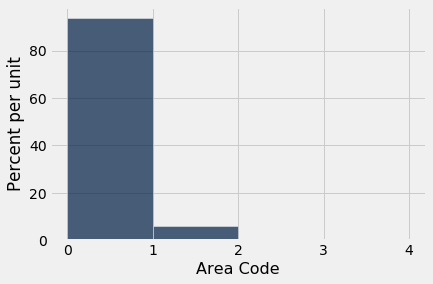

In [428]:
bins = np.arange(0,5,1) # Use these provided bins
big_boy=Table().with_columns("Area Code",test_statistics_under_null)
big_boy.hist("Area Code", bins=bins)

In [429]:
big_boy.where("Area Code",are.equal_to(1)).column("Area Code")

array([1., 1., 1., ..., 1., 1., 1.])

<div class="hide">\pagebreak</div>

**Question 8.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_8
manual: false
-->

In [430]:
# First calculate the observed value of the test statistic from the `spam` table.
observed_val = spam.where("Area Code",are.equal_to(781)).column("Area Code")
p_value = np.count_nonzero(test_statistics_under_null == 1)/20000
p_value

0.06075

In [431]:
ok.grade("q1_8");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 9.** Suppose you use a P-value cutoff of 1%. What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_9
manual: true
-->
<!-- EXPORT TO PDF -->

We reject the Null hpythosis and support the alternative hypthosis because we get 6.38% chance of picking another area code that isn't 781 also because 1/800 is 0.125 while the cutoff is 1% so therefore reject it.

## Part 2: Multiple Spammers

Instead of checking if the area code is equal to his own, Yanay decides to check if the area code matches the area code of one of the 8 places he's been to recently, and wants to test if it's more likely to receive a spam call with an area code from any of those 8 places. These are the area codes of the places he's been to recently: 781, 617, 509, 510, 212, 858, 339, 626.

**Question 10.** Define the null hypothesis and alternative hypothesis for this investigation.

*Reminder: Don’t forget that your null hypothesis should fully describe a probability model that we can use for simulation later.*


<!--
BEGIN QUESTION
name: q1_10
manual: true
-->
<!-- EXPORT TO PDF -->

Null hypothesis: Each area code has equal chance of getting chosen which is 8/800.Any deviation is due to random chance.Alternative hpyothesis: Each area code doesn't have a equal chance of getting chosen.


<div class="hide">\pagebreak</div>

**Suppose you decide to use the number of times you see any of the area codes of the places Yanay has been to in 50 spam calls as your test statistic.**

**Question 11.** 
Write a function called `simulate_visited_area_codes` that generates exactly one simulated value of your test statistic under the null hypothesis.  It should take no arguments and simulate 50 area codes under the assumption that the result of each area is sampled from the range 200-999 inclusive with equal probability. Your function should return the number of times you saw any of the area codes of the places Yanay has been to in those 50 spam calls.

*Hint*: You may find the textbook [section](https://www.inferentialthinking.com/chapters/11/1/Assessing_Models#Predicting-the-Statistic-Under-the-Model) on the `sample_proportions` function to be useful.

<!--
BEGIN QUESTION
name: q1_11
manual: false
-->

In [432]:
model_proportions = make_array(0.01,0.99)
def simulate_visited_area_codes():
    model_proportions = [0.01,0.99]
    return sample_proportions(50, model_proportions).item(0)*50
    
# Call your function to make sure it works
simulate_visited_area_codes()

0.0

In [433]:
sum([0.01,0.99])

1.0

In [434]:
ok.grade("q1_11");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 12.** Generate 20,000 simulated values of the number of times you see any of the area codes of the places Yanay has been to in 50 random spam calls. Assign `test_statistics_under_null` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 11.

<!--
BEGIN QUESTION
name: q1_12
manual: false
-->

In [435]:
visited_test_statistics_under_null = make_array()

repetitions = 20000
for i in np.arange(repetitions):
    visited_test_statistics_under_null=np.append(visited_test_statistics_under_null,simulate_visited_area_codes())
visited_test_statistics_under_null

array([0., 1., 0., ..., 0., 1., 0.])

In [436]:
ok.grade("q1_12");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 13.** Using the results from Question 12, generate a histogram of the empirical distribution of the number of times you saw any of the area codes of the places Yanay has been to in your simulation. **NOTE: Use the provided bins when making the histogram**

<!--
BEGIN QUESTION
name: q1_13
manual: true
-->
<!-- EXPORT TO PDF -->

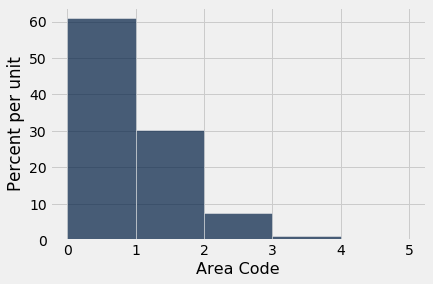

In [437]:
bins_visited = np.arange(0,6,1) # Use these provided bins
small_boy=Table().with_columns("Area Code",visited_test_statistics_under_null).hist("Area Code",bins=bins_visited)

<div class="hide">\pagebreak</div>

**Question 14.** Compute an empirical P-value for this test.


<!--
BEGIN QUESTION
name: q1_14
manual: false
-->

In [438]:
visited_area_codes = make_array(781, 617, 509, 510, 212, 858, 339, 626)
# First calculate the observed value of the test statistic from the `spam` table.
visited_observed_value = spam.where("Area Code",are.equal_to(781)).column("Area Code")
p_value = np.count_nonzero(visited_test_statistics_under_null == visited_area_codes)/20000
p_value

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


0.0

In [439]:
ok.grade("q1_14");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 15.** Suppose you use a P-value cutoff of 0.05% (**Note: that’s 0.05%, not our usual cutoff of 5%**). What do you conclude from the hypothesis test? Why?

<!--
BEGIN QUESTION
name: q1_15
manual: true
-->
<!-- EXPORT TO PDF -->

We accept the Null hypthoesis because the p-value cutoff is 0.05% and the p_value I got after simulation is 39.70% hence we accept the null hypthoesis and its due to the random deviation choice.

**Question 16.** Is `p_value`:

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.


<!--
BEGIN QUESTION
name: q1_16
manual: true
-->
<!-- EXPORT TO PDF -->

a

**Question 17.** Is 0.05% (the P-value cutoff):

* (a) the probability that the spam calls favored the visited area codes,
* (b) the probability that they didn't favor, or
* (c) neither

If you chose (c), explain what it is instead.

<!--
BEGIN QUESTION
name: q1_17
manual: true
-->
<!-- EXPORT TO PDF -->

b

**Question 18.** Suppose you run this test for 4000 different people after observing each person's last 50 spam calls. When you reject the null hypothesis for a person, you accuse the spam callers of favoring the area codes that person has visited. If the spam callers were not actually favoring area codes that people have visited, can we compute how many times we will incorrectly accuse the spam callers of favoring area codes that people have visited? If so, what is the number? Explain your answer. Assume a 0.05% P-value cutoff.

<!--
BEGIN QUESTION
name: q1_18
manual: true
-->
<!-- EXPORT TO PDF -->

## Part 3: Practice with A/B Tests

Yanay collects information about this month's spam calls. The table `with_labels` is a sampled table, where the `Area Code Visited` column contains either `"Yes"` or `"No"` which represents whether or not Yanay has visited the location of the area code. The `Picked Up` column is `1` if Yanay picked up and `0` if he did not pick up.

In [440]:
# Just run this cell
with_labels = Table().read_table("spam_picked_up.csv")
with_labels

Area Code Visited,Picked Up
No,0
No,1
No,1
Yes,0
No,0
No,0
Yes,0
No,1
No,1
No,1


Yanay is going to perform an A/B Test to see whether or not he is more likely to pick up a call from an area code he has visited. Specifically, his null hypothesis is that there is no difference in the distribution of calls he picked up between visited and not visited area codes, with any difference due to chance. His alternative hypothesis is that there is a difference between the two categories, specifically that he thinks that he is more likely to pick up if he has visited the area code. We are going to perform a [permutation test](https://www.inferentialthinking.com/chapters/12/1/AB_Testing.html#Permutation-Test) to test this. Our test statistic will be the difference in proportion of calls picked up between the area codes Yanay visited and the area codes he did not visit.

**Question 19.** Complete the `difference_in_proportion` function to have it calculate this test statistic, and use it to find the observed value. The function takes in a sampled table which can be any table that has the same columns as `with_labels`. We'll call `difference_in_proportion` with the sampled table `with_labels` in order to find the observed difference in proportion.

<!--
BEGIN QUESTION
name: q1_19
manual: false
-->

In [452]:
def difference_in_proportion(sample):
    # Take a look at the code for `proportion_visited` and use that as a 
    # hint of what `proportions` should be assigned to
    proportions = with_labels.group("Area Code Visited", np.mean)
    proportion_visited = proportions.where("Area Code Visited", "Yes").column("Picked Up mean").item(0)
    proportion_not_visited = proportions.where("Area Code Visited", "No").column("Picked Up mean").item(0)


observed_diff_proportion = abs(proportion_visited -proportion_not_visited  )
observed_diff_proportion

0.21904761904761905

In [444]:
proportions = with_labels.group("Area Code Visited", np.mean)
proportions

Area Code Visited,Picked Up mean
No,0.514286
Yes,0.733333


In [448]:
proportion_visited = proportions.where("Area Code Visited", "Yes").column("Picked Up mean").item(0)
proportion_visited 

0.7333333333333333

In [450]:
proportion_not_visited = proportions.where("Area Code Visited", "No").column("Picked Up mean").item(0)

proportion_not_visited 

0.5142857142857142

In [453]:
ok.grade("q1_19");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 20.** To perform a permutation test we shuffle the labels, because our null hypothesis is that the labels don't matter because the distribution of calls he picked up between visited and not visited area codes come from same underlying distribution. The labels in this case is the `"Area Code Visited"` column containing `"Yes"` and `"No"`.

Write a function to shuffle the table and return a test statistic using the function you defined in question 19.

*Hint: To shuffle labels, we sample without replacement and then replace the appropriate column with the new shuffled column.*

<!--
BEGIN QUESTION
name: q1_20
manual: false
-->

In [497]:
def simulate_one_stat():
    shuffled = with_labels.sample(with_replacement=False)
    original_with_shuffled_labels = with_labels.with_column("Area Code Visited",shuffled.column("Area Code Visited"))
    return difference_in_proportion(original_with_shuffled_labels)

one_simulated_test_stat = simulate_one_stat() 
one_simulated_test_stat

In [498]:
ok.grade("q1_20");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q1_20 > Suite 1 > Case 1

>>> -0.75 <= one_simulated_test_stat <= 0.75
TypeError: '<=' not supported between instances of 'float' and 'NoneType'

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: '<=' not supported between instances of 'float' and 'NoneType'

Run only this test case with "python3 ok -q q1_20 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



**Question 21.** Generate 1,000 simulated test statistic values. Assign `test_stats` to an array that stores the result of each of these trials. 

*Hint*: Use the function you defined in Question 20.

We also provided code that'll generate a histogram for you after generating a 1000 simulated test statistic values.

<!--
BEGIN QUESTION
name: q1_21
manual: true
-->
<!-- EXPORT TO PDF -->

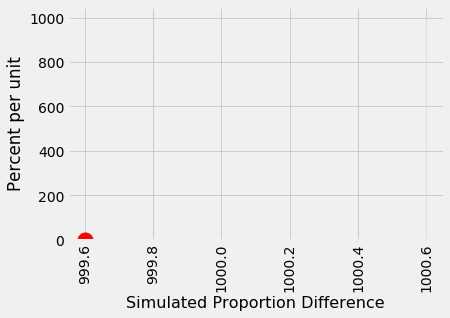

In [493]:
trials = make_array()
test_stats = 1000
for i in np.arange(test_stats):
    one_code=simulate_one_stat()
    trials=np.append(trials,one_code)


# here's code to generate a histogram of values and the red dot is the observed value
Table().with_column("Simulated Proportion Difference", test_stats).hist("Simulated Proportion Difference");
plt.plot(observed_diff_proportion, 0, 'ro', markersize=15);

**Question 22.** Compute the empirical p-value for this test, and assign it to `p_value_ab`.

<!--
BEGIN QUESTION
name: q1_22
manual: false
-->

In [494]:
p_value_ab =np.count_nonzero(trials>=observed_diff_proportion)/1000
p_value_ab

TypeError: '>=' not supported between instances of 'NoneType' and 'float'

In [495]:
ok.grade("q1_22");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q1_22 > Suite 1 > Case 1

>>> p_value_ab > 0.05
NameError: name 'p_value_ab' is not defined

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     NameError: name 'p_value_ab' is not defined

Run only this test case with "python3 ok -q q1_22 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



For `p_value_ab`, you should be getting a value around 10-15%. If our p-value cutoff is 5%, the data is more consistent with the null hypothesis - that there is no difference in the distribution of calls Yanay picked up between visited and not visited area codes.

## 2. Mid-Semester Survey


Once you have submitted, please also take the time to complete the Mid-Semester Survey! We really appreciate your honest feedback and it helps us improve the course!

The Mid-Semester survey is here: https://docs.google.com/forms/d/e/1FAIpQLSdyq7HSgY-pRDSOyIcHKPT8Ojfb4veVjUKG10AQReH6UBG_PQ/viewform?usp=sf_link

**Question 1.** Fill out the mid-semester survey linked above. Right before submitting, a special string will be displayed. Set `special_string` to the special string at the end of the form.

<!--
BEGIN QUESTION
name: q2_1
manual: false
-->

In [22]:
special_string = "happy math.pi day on 3/14!"

In [23]:
ok.grade("q2_1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [499]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Submit... 100% complete
Submission successful for user: wajakhan@berkeley.edu
URL: https://okpy.org/cal/data8/sp20/hw07/submissions/79vPxr



In [349]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t